In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format='svg'

## Series

Series is a one-dimensional labeled array capable of holding any data type
(integers, strings, floating point numbers, Python objects, etc.). The axis labels are
collectively referred to as the index.

Basic method to create a series:
`s = pd.Series(data, index = index)`

Data Can be many things:
- A Python Dictionary
- An ndarray (or reg. list)
- A scalar

The passed index is a list of axis labels (which varies on what data is)


In [2]:
# From array, default index = 0..n-1
fs=pd.Series([1,2,4,8,16,32,64])
print(type(fs))
print(fs)

<class 'pandas.core.series.Series'>
0     1
1     2
2     4
3     8
4    16
5    32
6    64
dtype: int64


In [3]:
# From np array.  Provided index length must be identical to data length
s1 = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s1, end='\n\n')
print(s1.index, end='\n\n')
print(s1.idxmax())

a   -0.565903
b   -0.771904
c   -1.944256
d   -2.373910
e   -0.423474
dtype: float64

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

e


In [4]:
# From a dic, default index is built from keys
d2 = {'a':1, 'b':2, 'c':3}
s2 = pd.Series(d2)
print(s2, end='\n\n')
# index can be provided
s3 = pd.Series(d2, index=['c', 'd', 'a', 'b'])
print(s3)

a    1
b    2
c    3
dtype: int64

c    3.0
d    NaN
a    1.0
b    2.0
dtype: float64


In [5]:
# From scalar data, automatic broadcast
s4 = pd.Series(4, index=['Four', 'Quatre', 'Vier', '四', '٤'])
print(s4)

Four      4
Quatre    4
Vier      4
四         4
٤         4
dtype: int64


In [6]:
# Series expression and indexing with a boolean Series
print(s1, end='\n\n')
print('mean=', s1.mean(),end='\n\n')
print(s1>s1.mean(), end='\n\n')
print(s1[s1>s1.mean()])

a   -0.565903
b   -0.771904
c   -1.944256
d   -2.373910
e   -0.423474
dtype: float64

mean= -1.2158893322592665

a     True
b     True
c    False
d    False
e     True
dtype: bool

a   -0.565903
b   -0.771904
e   -0.423474
dtype: float64


In [7]:
# Support slicing, using index
print(s1[1:3])

b   -0.771904
c   -1.944256
dtype: float64


In [8]:
# Acts like a dic
print(s1['c'])
print('e' in s1)
print(s1.get('f', None))

-1.944256124818704
True
None


In [9]:
# Works well with numpy
print(np.exp(s1), end='\n\n')

a    0.567847
b    0.462132
c    0.143094
d    0.093116
e    0.654768
dtype: float64



In [10]:
# Combine with scalar
5+s1

a    4.434097
b    4.228096
c    3.055744
d    2.626090
e    4.576526
dtype: float64

In [11]:
print(s1.values)
print(s1.index)
print(s1.shape)
print(s1.describe())    # Some 1-D stats

[-0.56590255 -0.77190393 -1.94425612 -2.37391049 -0.42347358]
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
(5,)
count    5.000000
mean    -1.215889
std      0.883043
min     -2.373910
25%     -1.944256
50%     -0.771904
75%     -0.565903
max     -0.423474
dtype: float64


In [12]:
# Iteration, iteritems is a (k, v) iterator
for k, v in s1.iteritems():
    print(k,': ',v,sep='')

a: -0.5659025476931103
b: -0.7719039268630544
c: -1.944256124818704
d: -2.373910486557318
e: -0.42347357536414554


In [13]:
# Sorting
print(s1.sort_index(), end='\n\n')
print(s1.sort_values())

a   -0.565903
b   -0.771904
c   -1.944256
d   -2.373910
e   -0.423474
dtype: float64

d   -2.373910
c   -1.944256
b   -0.771904
a   -0.565903
e   -0.423474
dtype: float64


In [14]:
# Value counts
s5 = pd.Series([0,0,0,1,1,1,2,2,2,2])
print(s5.value_counts().sort_index())

0    3
1    3
2    4
dtype: int64


In [15]:
s1.min(), s1.max(), s1.mean(), s1.median()

(-2.373910486557318,
 -0.42347357536414554,
 -1.2158893322592665,
 -0.7719039268630544)

## DataFrames
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.

You can create a series from:
- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy array
- A list of dictionaries
- A Series
- Another Dataframe

`df = pd.DataFrame(data, index = index, columns = columns)`

index/ columns is a list of the row/ column labels. If you pass an index and/ or
columns, you are guarenteeing the index and /or column of the df.
If you do not pass anything in, the input will be constructed by "common sense"
rules. 

In [16]:
# Create a dictionary of series
d = {'one': pd.Series([1,2,3], index = ['a', 'b', 'd']), 'two': pd.Series(list(range(4)), index = ['a','b', 'c', 'd'])}
# Columns are dictionary keys, indices and values obtained from series
df = pd.DataFrame(d)
print(df)

   one  two
a  1.0    0
b  2.0    1
c  NaN    2
d  3.0    3


In [17]:
# Can force index
print(pd.DataFrame(d, index = ['d', 'b', 'a']), end='\n\n')
# Can force columns
print(pd.DataFrame(d, index = ['d', 'b', 'a'], columns = ['two', 'three']))

   one  two
d    3    3
b    2    1
a    1    0

   two three
d    3   NaN
b    1   NaN
a    0   NaN


In [18]:
# Accessing attributes
print(df.index)
print(df.columns)
print(df.shape)

Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['one', 'two'], dtype='object')
(4, 2)


In [19]:
j = pd.DataFrame({'Jours':['Lundi','Mardi','Mercredi'], 
                  'Days':['Monday', 'Tuesday', 'Wednesday'], 
                  'Tage':['Montag', 'Dienstag', 'Mittwoch']}, index=range(1,4))
j

,Days,Jours,Tage
1,Monday,Lundi,Montag
2,Tuesday,Mardi,Dienstag
3,Wednesday,Mercredi,Mittwoch


In [20]:
# Providing data per row (a list of dictionaries)
data = []
for i in range(8):
    data.append({'Column' + str(j):np.random.randint(100) for j in range(6)})
print(data)
rdf = pd.DataFrame(data)
rdf

[{'Column0': 35, 'Column1': 90, 'Column2': 63, 'Column3': 29, 'Column4': 48, 'Column5': 65}, {'Column0': 31, 'Column1': 57, 'Column2': 73, 'Column3': 98, 'Column4': 17, 'Column5': 60}, {'Column0': 77, 'Column1': 74, 'Column2': 16, 'Column3': 85, 'Column4': 82, 'Column5': 23}, {'Column0': 26, 'Column1': 38, 'Column2': 84, 'Column3': 59, 'Column4': 79, 'Column5': 43}, {'Column0': 37, 'Column1': 46, 'Column2': 36, 'Column3': 75, 'Column4': 66, 'Column5': 64}, {'Column0': 21, 'Column1': 51, 'Column2': 73, 'Column3': 36, 'Column4': 59, 'Column5': 90}, {'Column0': 31, 'Column1': 83, 'Column2': 15, 'Column3': 10, 'Column4': 49, 'Column5': 77}, {'Column0': 89, 'Column1': 99, 'Column2': 90, 'Column3': 18, 'Column4': 36, 'Column5': 35}]


,Column0,Column1,Column2,Column3,Column4,Column5
0,35,90,63,29,48,65
1,31,57,73,98,17,60
2,77,74,16,85,82,23
3,26,38,84,59,79,43
4,37,46,36,75,66,64
5,21,51,73,36,59,90
6,31,83,15,10,49,77
7,89,99,90,18,36,35


In [21]:
# Providing data per column (a dictionary of lists)
dk = {}
for c in range(6):
    dk['Column' + str(c)] = [np.random.randint(100) for r in range(8)]
print(dk)
pd.DataFrame(dk)

{'Column0': [68, 7, 85, 91, 42, 44, 82, 95], 'Column1': [4, 44, 70, 98, 10, 8, 93, 85], 'Column2': [85, 49, 63, 10, 19, 4, 7, 58], 'Column3': [57, 6, 17, 13, 68, 26, 1, 60], 'Column4': [0, 27, 59, 78, 26, 28, 62, 31], 'Column5': [38, 28, 10, 54, 93, 68, 81, 51]}


,Column0,Column1,Column2,Column3,Column4,Column5
0,68,4,85,57,0,38
1,7,44,49,6,27,28
2,85,70,63,17,59,10
3,91,98,10,13,78,54
4,42,10,19,68,26,93
5,44,8,4,26,28,68
6,82,93,7,1,62,81
7,95,85,58,60,31,51


In [22]:
# Can force columns
pd.DataFrame(data, columns = ['Column0', 'Column1'])

,Column0,Column1
0,35,90
1,31,57
2,77,74
3,26,38
4,37,46
5,21,51
6,31,83
7,89,99


In [23]:
# Properties of a DataFrame
print(rdf.index)
print(rdf.columns)
print(rdf.shape)
print(rdf.values)  # numpy array of values

RangeIndex(start=0, stop=8, step=1)
Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5'], dtype='object')
(8, 6)
[[35 90 63 29 48 65]
 [31 57 73 98 17 60]
 [77 74 16 85 82 23]
 [26 38 84 59 79 43]
 [37 46 36 75 66 64]
 [21 51 73 36 59 90]
 [31 83 15 10 49 77]
 [89 99 90 18 36 35]]


In [24]:
# Adding and accessing columns.  Simple index -> column
dg = {'one': pd.Series([1,2,3], index = ['a', 'b', 'c']),
      'two': pd.Series(range(4), index = ['a','b', 'c', 'd'])}
dfg = pd.DataFrame(dg)
# multiply
dfg['three'] = dfg['one']*dfg['two']
# Create a boolean flag
dfg['flag'] = dfg['one'] > 2
print(dfg, end='\n\n')

print(dfg['one'])   # Returns a Series

   one  two  three   flag
a  1.0    0    0.0  False
b  2.0    1    2.0  False
c  3.0    2    6.0   True
d  NaN    3    NaN  False

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64


In [25]:
# inserting column in specified location
dfg.insert(1, 'bar', dfg['one'][:2])   # Insert new column at position 1, copying column 'one' values on rows 0 and 1
three=dfg.pop('three')
dfg['extra']=1.414
dfg

,one,bar,two,flag,extra
a,1.0,1.0,0,False,1.414
b,2.0,2.0,1,False,1.414
c,3.0,NaN,2,True,1.414
d,NaN,NaN,3,False,1.414


In [26]:
# Indexing and selection
# Select single column -> Series
print(dfg['bar'].values)
# Select Row by label -> Series
print(dfg.loc['b'].values)
# Select row by index -> Series
print(dfg.iloc[3].values)

[ 1.  2. nan nan]
[2.0 2.0 1 False 1.414]
[nan nan 3 False 1.414]


In [27]:
# Slice rows -> DataFrame.  Beware, when using a single label ['one'] it selects a column...
dfg[1:3]
# Note that dfg[1] is an error

,one,bar,two,flag,extra
b,2.0,2.0,1,False,1.414
c,3.0,NaN,2,True,1.414


In [28]:
# Select multiple columns (a list of column labels) -> DataFrame
dfg[['one','flag']]

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [29]:
# Slice rows by boolean series (SELECT)
print(dfg['two']%2==0)    # Retuns a boolean Series, one value per row
dfg[dfg['two']%2==0]

a     True
b    False
c     True
d    False
Name: two, dtype: bool


,one,bar,two,flag,extra
a,1.0,1.0,0,False,1.414
c,3.0,NaN,2,True,1.414


In [30]:
# SELECT rows and filter columns.  Have to use loc function, since direct slicing
# does not allow multiple argumnts
dfg.loc[dfg['two']%2==0, ['one','flag']]

,one,flag
a,1.0,False
c,3.0,True


In [31]:
# Slect by position
df0 = pd.DataFrame(np.random.randn(6,4),index=list(range(0,12,2)), columns=list(range(0,12,3)))
df0

,0,3,6,9
0,0.684372,-0.255633,-1.683635,-0.274405
2,-1.294982,-0.653574,0.276924,0.785571
4,-0.481187,-1.470425,1.015180,2.586082
6,-1.624710,1.539255,0.667387,-0.350336
8,0.418811,-0.160522,1.620280,0.249638
10,0.261536,0.068299,-1.036778,0.882275


In [32]:
# iloc slices
# Print rows 0-2
print(df0.iloc[:3], end='\n\n')
# print rows 1:4 and columns 2 : 4
print(df0.iloc[1:5, 2:4])

          0         3         6         9
0  0.684372 -0.255633 -1.683635 -0.274405
2 -1.294982 -0.653574  0.276924  0.785571
4 -0.481187 -1.470425  1.015180  2.586082

          6         9
2  0.276924  0.785571
4  1.015180  2.586082
6  0.667387 -0.350336
8  1.620280  0.249638


In [33]:
# select via integer list
print(df0.iloc[[1,3,5], [1,3]], end='\n\n')
# selecting via integer mask
boolean_mask = df0.iloc[:, 1] > 0.0
print(boolean_mask.values, end='\n\n')
print(df0.iloc[boolean_mask.values, 1], end='\n\n')   # ,1 means column 1 -> Series
print(df0.iloc[boolean_mask.values, [1,2]])           # list of columns -> DataFrame

           3         9
2  -0.653574  0.785571
6   1.539255 -0.350336
10  0.068299  0.882275

[False False False  True False  True]

6     1.539255
10    0.068299
Name: 3, dtype: float64

           3         6
6   1.539255  0.667387
10  0.068299 -1.036778


In [34]:
# Selection by callable indexer
df1 = pd.DataFrame(np.random.randn(6,4), index=list(range(0,12,2)), columns=list('abcd'))
df1

,a,b,c,d
0,0.495301,-0.320106,0.256267,-0.192692
2,-0.295749,-1.665553,-0.801919,0.309735
4,0.520171,-1.092773,-2.380084,0.343581
6,-1.369950,-1.100876,0.095315,-0.021797
8,-1.632812,-1.880494,-1.184270,0.288490
10,-0.624271,-0.627744,-0.711109,-1.733789


In [35]:
# Note that I've not been able to understand lambas on columns or how to do more
# sophisticated lambdas...  Need to read the doc!
print(df1.loc[lambda x: x.a > 0, :], end='\n\n')

          a         b         c         d
0  0.495301 -0.320106  0.256267 -0.192692
4  0.520171 -1.092773 -2.380084  0.343581



In [36]:
# Boolean indexing operators are: | for or, & for and, and ~ for not.
print(df1[df1['a'] > 0], end='\n\n')
# Same output, different method
print(df1[~(df1['a'] < 0)])

          a         b         c         d
0  0.495301 -0.320106  0.256267 -0.192692
4  0.520171 -1.092773 -2.380084  0.343581

          a         b         c         d
0  0.495301 -0.320106  0.256267 -0.192692
4  0.520171 -1.092773 -2.380084  0.343581


In [37]:
df2 = pd.DataFrame({'a' : ['one', 'one', 'two', 'three', 'two', 'one', 'six'],
                    'b' : ['x', 'y', 'y', 'x', 'y', 'x', 'x'], 
                    'c' : np.random.randn(7)})
criterion = df2['a'].map(lambda x: x.startswith('t'))
print(df2[criterion], end='\n\n')
# Above is equivalent to df2[[x.startswith('t') for x in df2['a]]]
print(df2[criterion & (df2['b'] == 'x')])
# Pretty much same as boolean mask with numpy but with columns

       a  b         c
2    two  y -0.335568
3  three  x -1.313354
4    two  y -0.165943

       a  b         c
3  three  x -1.313354


In [38]:
# Indexing with Series.isin
s = pd.Series(np.arange(5), index=['r'+str(x) for x in np.arange(5)[::-1]], dtype='int64')
print(s, end='\n\n')
print(s.isin([2,4,5]), end='\n\n')
print(s[s.isin([2,4,5])])

r4    0
r3    1
r2    2
r1    3
r0    4
dtype: int64

r4    False
r3    False
r2     True
r1    False
r0     True
dtype: bool

r2    2
r0    4
dtype: int64


In [39]:
# Example with dataframes
df3 = pd.DataFrame({'a' : ['one', 'one', 'two', 'three', 'two', 'one', 'six'],
                    'b' : ['x', 'y', 'y', 'x', 'y', 'x', 'x'], 
                    'c' : np.random.randn(7)})
print(df3)
df3[df3['a'].isin(['one', 'three'])&(df3['b'].isin(['x']))] [['b','c']]

       a  b         c
0    one  x  1.211946
1    one  y -0.549908
2    two  y -0.323993
3  three  x -0.447265
4    two  y  0.992736
5    one  x  0.567949
6    six  x -2.027248


,b,c
0,x,1.211946
3,x,-0.447265
5,x,0.567949


In [40]:
# Iteration: slow, sometimes not writable (can return a copy or a view) -> use vectorized ops instead
# for col in df -> yield column labels
for col in df2:
    print(col)
print()
# iter on row and series
for index, series in df2.iterrows():
    print(index,series.values)
# Don't iterate in Pandas!!!

a
b
c

0 ['one' 'x' 0.15623500196273207]
1 ['one' 'y' 0.04214471773317156]
2 ['two' 'y' -0.33556779504848416]
3 ['three' 'x' -1.313354207199013]
4 ['two' 'y' -0.16594328746476678]
5 ['one' 'x' 0.29212216542626646]
6 ['six' 'x' -0.9902529112627658]


In [41]:
# Prepare iris csv
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=[x.replace(' (cm)','').replace(' ','_') for x in iris.feature_names])
df['name']=iris.target_names[iris.target]   # Add species column
df.to_csv("iris.csv", index=False)

In [42]:
data = pd.read_csv('iris.csv')
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
name            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
# Concatenation of DataFrames
tf1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']}, index=[0, 1, 2, 3])
tf2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},index=[4, 5, 6, 7])
tf3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},index=[8, 9, 10, 11])
tf4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},index=[2, 3, 6, 7])
end_string = '\n' + '--'*25 + '\n'
print(tf1,tf2,tf3,tf4, sep = end_string)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
--------------------------------------------------
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
--------------------------------------------------
      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11
--------------------------------------------------
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


In [44]:
result = pd.concat([tf1, tf2, tf3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [45]:
results = pd.concat([tf1, tf2, tf3], keys = ['a','b','c'])
print(results, end = end_string)
print(results.loc['a'])
results.info()

        A    B    C    D
a 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
b 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
c 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11
--------------------------------------------------
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, (a, 0) to (c, 11)
Data columns (total 4 columns):
A    12 non-null object
B    12 non-null object
C    12 non-null object
D    12 non-null object
dtypes: object(4)
memory usage: 640.0+ bytes


In [46]:
pd.concat([tf1, tf4], axis = 1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [47]:
pd.concat([tf1, tf4], axis = 1, join = 'inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [48]:
pd.concat([tf1, tf4], axis=1, join_axes=[tf1.index])

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [49]:
# Using append
tf1.append(tf1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [50]:
tf1.append(tf4)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [51]:
tf1.append([tf2, tf3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [52]:
# apply examples, row or column wise
af1 = pd.DataFrame(np.random.randn(6,4), index=list(range(0,12,2)), columns=list('abcd'))
print(af1)

           a         b         c         d
0   0.132127  1.396940 -0.562539 -1.212344
2   0.045801 -0.897474 -0.542280  0.127768
4   0.188411 -1.171959 -0.033965 -0.418714
6  -1.005483 -0.847970 -1.670727 -1.075912
8  -0.911656  0.803453 -0.129553  1.297312
10 -0.669692  0.306952 -1.656412 -1.521843


In [53]:
print(af1.apply(np.mean))    # By derault, per column

a   -0.370082
b   -0.068343
c   -0.765913
d   -0.467289
dtype: float64


In [54]:
print(af1.apply(np.mean, axis=1))   # per row

0    -0.061454
2    -0.316546
4    -0.359057
6    -1.150023
8     0.264889
10   -0.885249
dtype: float64


In [55]:
# Use lambda functions to normalize columns
print(df1.apply(lambda x: (x - x.mean())/ x.std(), axis=0))

           a         b         c         d
0   1.078497  1.339464  1.092075 -0.031321
2   0.207810 -0.928895 -0.014945  0.599478
4   1.105872  0.036784 -1.665939  0.641972
6  -0.974534  0.023123  0.923695  0.183239
8  -1.263860 -1.291275 -0.414941  0.572805
10 -0.153785  0.820800  0.080056 -1.966173


In [56]:
# Find where the maximum dates occured for each column
tsdf = pd.DataFrame(np.random.randn(1000, 3), columns=['A', 'B', 'C'],
                    index=pd.date_range('1/1/2000', periods=1000))
print(tsdf[:5], end='\n\n')
print(tsdf.apply(lambda x: x.idxmax()))

                   A         B         C
2000-01-01  0.634165  0.134801 -0.188368
2000-01-02 -1.426274  0.525030  1.035346
2000-01-03 -2.679392 -0.449527 -0.642930
2000-01-04  2.159145 -0.206304  0.959094
2000-01-05  0.747895  2.372017  0.090688

A   2000-06-17
B   2001-10-24
C   2002-02-27
dtype: datetime64[ns]


In [57]:
# applymap, elementwise.  Note, Series objects support .map instead of applymap
tmp = tsdf.applymap(lambda x: 1/x)
print(tmp[:5])

                   A         B          C
2000-01-01  1.576877  7.418321  -5.308760
2000-01-02 -0.701127  1.904654   0.965861
2000-01-03 -0.373219 -2.224563  -1.555380
2000-01-04  0.463146 -4.847225   1.042650
2000-01-05  1.337085  0.421582  11.026808


In [58]:
# groupby: split-apply-combine operation:
# Split the data into groups based on some criteria
# Apply a function to each group independently
# Combine the results
dg = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
print(dg)
print(dg.groupby('key'))

   data key
0     0   A
1     5   B
2    10   C
3     5   A
4    10   B
5    15   C
6    10   A
7    15   B
8    20   C


In [59]:
irisdata = pd.read_csv('iris.csv')
print(irisdata[:5])

   sepal_length  sepal_width  petal_length  petal_width    name
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [60]:
groupby_name = irisdata.groupby('name')
means = groupby_name.aggregate(np.mean)
means

,sepal_length,sepal_width,petal_length,petal_width
name,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [61]:
print(groupby_name.groups)

{'setosa': Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64'), 'versicolor': Int64Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
            67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
            84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64'), 'virginica': Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
            113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
            126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
            139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
           dtype='int64')}


In [62]:
# Get a specific group
setosa = groupby_name.get_group('setosa')
print(setosa[:5])

   sepal_length  sepal_width  petal_length  petal_width    name
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [63]:
# Aggregate using multipl functions
groupby_name.aggregate([np.mean, np.median, np.std])

sepal_length                  sepal_width                   \
                   mean median       std        mean median       std   
name                                                                    
setosa            5.006    5.0  0.352490       3.418    3.4  0.381024   
versicolor        5.936    5.9  0.516171       2.770    2.8  0.313798   
virginica         6.588    6.5  0.635880       2.974    3.0  0.322497   

           petal_length                  petal_width                   
                   mean median       std        mean median       std  
name                                                                   
setosa            1.464   1.50  0.173511       0.244    0.2  0.107210  
versicolor        4.260   4.35  0.469911       1.326    1.3  0.197753  
virginica         5.552   5.55  0.551895       2.026    2.0  0.274650

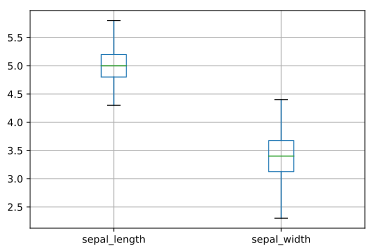

In [64]:
# Can plot
# Make sure magic statements have been executed
# %matplotlib inline
# %config InlineBackend.figure_format='svg'
ax = groupby_name.get_group('setosa').boxplot(column=["sepal_length","sepal_width"], 
                                              return_type='axes')

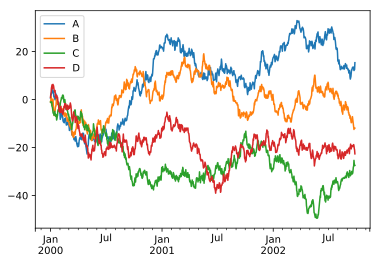

In [65]:
# Other plot example
df = pd.DataFrame(np.random.randn(1000, 4), index =pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
df = df.cumsum()
df.plot()

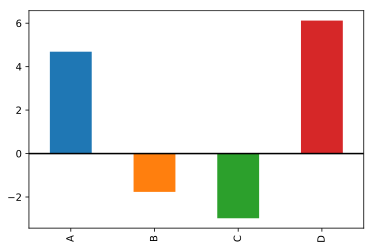

In [66]:
import matplotlib.pyplot as plt
plt.figure()
df.iloc[5].plot(kind = 'bar')
plt.axhline(0, color = 'k')